## Optimize the Model


In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#history = History()

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial EIN column
application_df.drop(['EIN'],axis=1,inplace=True)

In [ ]:
# display the number of unique values

application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [ ]:
application_df.value_counts('NAME')

NAME
PARENT BOOSTER USA INC                             1260
TOPS CLUB INC                                       765
UNITED STATES BOWLING CONGRESS INC                  700
WASHINGTON STATE UNIVERSITY                         492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC     408
                                                   ... 
FUSION ARTS UNLIMITED INC                             1
FURRST AND FURRMOST POOCH SANCTUARY INC               1
FURNISHING HOPE AZ INC                                1
FUNNY RIVER EMERGENCY SERVICES                        1
ZURICH PUBLISHING FOUNDATION INC                      1
Length: 19568, dtype: int64

In [ ]:
# Look at NAME value counts for binning

#  How many name counts are greater than 5?

# Choose a cutoff value and create a list of NAMEs to be replaced
all_name_counts = application_df['NAME'].value_counts()
name_count_df = all_name_counts.to_frame()
name_count_df
other_name_df = name_count_df[name_count_df['NAME']<=5].reset_index()




names_to_replace = other_name_df['index']

names_to_replace
# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")
application_df['NAME'].value_counts()
# Check to make sure binning was successful

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df.value_counts('APPLICATION_TYPE')

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

In [ ]:
# Determine which values to replace if application counts are less than 500
all_app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_count_df = all_app_counts.to_frame()
app_count_df
other_app_df = app_count_df[app_count_df['APPLICATION_TYPE']<=100].reset_index()

application_types_to_replace = other_app_df['index']
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")
# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()



T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()

In [ ]:
# Determine which values to replace if counts are less than 1000
class_count_df= class_count.to_frame()
other_class_df = class_count_df[class_count_df['CLASSIFICATION']<=1000].reset_index()
#other_class_df
low_count_classes = other_class_df['index']
# Replace in dataframe
for other_class in low_count_classes:
#  print('replacing ' + other_class + 'with Other')
  application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(other_class,"Other")

# Check to make sure binning was successful
application_df.info()
application_df['CLASSIFICATION'].value_counts()
application_df.nunique()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


NAME                       355
APPLICATION_TYPE            10
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [ ]:
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Create a OneHotEncoder instance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALPHA SIGMA PHI FRATERNITY INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHEMICAL SOCIETY,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN COLLEGE OF NURSE-MIDWIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF LABOR & CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF LABOR AND CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN HIBISCUS,NAME_AMERICAN INDEPENDENT BUSINESS ALLIANCE,NAME_AMERICAN INSTITUTE OF GRAPHIC ARTS,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN NEPHROLOGY NURSES ASSOCIATION,NAME_AMERICAN POSTAL WORKERS UNION,NAME_AMERICAN SOCIETY OF ADDICTION MEDICINE INC,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN VOLKSSPORT ASSOCIATION INC,NAME_AMERICAN WATER WORKS ASSOCIATION,NAME_AMERICAN YOUTH FOOTBALL INC,NAME_AMERICANS UNITED FOR SEPARATION OF CHURCH AND STATE,NAME_AMIGOS DE LAS AMERICAS,...,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [ ]:
encode_df.info(max_cols=400)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 397 columns):
 #    Column                                                                       Non-Null Count  Dtype  
---   ------                                                                       --------------  -----  
 0    NAME_AACE INTERNATIONAL                                                      34299 non-null  float64
 1    NAME_ACE MENTOR PROGRAM OF AMERICA INC                                       34299 non-null  float64
 2    NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS                34299 non-null  float64
 3    NAME_AIR FORCE ASSOCIATION                                                   34299 non-null  float64
 4    NAME_ALABAMA FEDERATION OF WOMENS CLUBS                                      34299 non-null  float64
 5    NAME_ALABAMA TREASURE FOREST ASSOCIATION                                     34299 non-null  float64
 6    NAME_ALBANY STATE UNIVERSITY

In [ ]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALPHA SIGMA PHI FRATERNITY INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC,NAME_AMERICAN CHEMICAL SOCIETY,NAME_AMERICAN CHRISTIAN FICTION WRITERS INC,NAME_AMERICAN COLLEGE OF HEALTHCARE EXECUTIVES,NAME_AMERICAN COLLEGE OF NURSE-MIDWIVES,NAME_AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES,NAME_AMERICAN FEDERATION OF LABOR & CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF LABOR AND CONGRESS OF INDUSTRIAL ORGS,NAME_AMERICAN FEDERATION OF STATE COUNTY & MUNICIPAL EMPLOYEES,NAME_AMERICAN HIBISCUS,NAME_AMERICAN INDEPENDENT BUSINESS ALLIANCE,NAME_AMERICAN INSTITUTE OF GRAPHIC ARTS,NAME_AMERICAN IRIS SOCIETY,NAME_AMERICAN LEGION,NAME_AMERICAN LEGION AUXILIARY,NAME_AMERICAN NEPHROLOGY NURSES ASSOCIATION,NAME_AMERICAN POSTAL WORKERS UNION,NAME_AMERICAN SOCIETY OF ADDICTION MEDICINE INC,NAME_AMERICAN STUDENT DENTAL ASSOCIATION,NAME_AMERICAN VOLKSSPORT ASSOCIATION INC,NAME_AMERICAN WATER WORKS ASSOCIATION,...,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1

In [ ]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
from keras.callbacks import History 
history = History()
#History = nn.fit_generator()

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               40000     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 43,351
Trainable params: 43,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[history])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5182 - accuracy: 0.7667
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4492 - accuracy: 0.7923
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4365 - accuracy: 0.7966
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4311 - accuracy: 0.7968
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4278 - accuracy: 0.7977
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4252 - accuracy: 0.7985
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4238 - accuracy: 0.7998
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4224 - accuracy: 0.7986
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4213 - accuracy: 0.8003
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4205 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4440 - accuracy: 0.7886 - 479ms/epoch - 2ms/step
Loss: 0.4439689815044403, Accuracy: 0.7885714173316956


dict_keys(['loss', 'accuracy'])


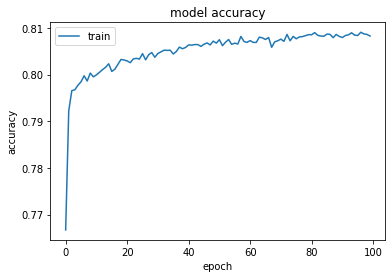

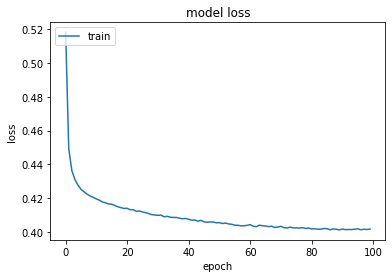

In [ ]:
import matplotlib.pyplot as plt
print(fit_model.history.keys())
# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
#plt.plot(fit_model.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fit_model.history['loss'])
#plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
prediction = np.round(nn.predict(X_test_scaled))
prediction
trans_prediction=prediction.reshape(-1)
#y_test
print(y_test.shape,trans_prediction.shape)

wrong_predictions = X_test[trans_prediction != y_test]
wrong_predictions

(8575,) (8575,)


array([[1.000000e+00, 1.465100e+04, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.144674e+06, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 8.554410e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 5.053790e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [ ]:
incorrects = np.nonzero(nn.predict_classes(X_test_scaled).reshape((-1,)) != y_test)

AttributeError: ignored

In [ ]:
#print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
#print(history.history['val_loss'])

KeyError: ignored

In [ ]:
nn.history

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

USE A RANDOM FOREST CLASSIFIER ON THE DATASET

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classifier.
rand_clas = RandomForestClassifier(random_state=1, n_estimators=500)




In [ ]:
# Fitting the model
clf=rand_clas.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8785181153786348
Testing Score: 0.7763265306122449


In [ ]:
!pip install keras_tuner
import kerastuner as kt

In [ ]:
X_train_scaled.shape

(25724, 399)

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=399))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model
  

In [ ]:
# Import the kerastuner library


tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Trial 72 Complete [00h 00m 56s]
val_accuracy: 0.7906705737113953

Best val_accuracy So Far: 0.7941690683364868
Total elapsed time: 00h 08m 21s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 1,
 'tuner/bracket': 0,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/round': 0,
 'units_0': 5,
 'units_1': 1,
 'units_2': 3,
 'units_3': 7,
 'units_4': 9,
 'units_5': 5}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4367 - accuracy: 0.7942 - 594ms/epoch - 2ms/step
Loss: 0.43667757511138916, Accuracy: 0.7941690683364868


In [ ]:
# Export our model to HDF5 file
best_model.save("AlphabetSoupCharity_Optimization_ht.h5")